# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_inisiasi.csv'
# Pastikan path file sudah sesuai
df = pd.read_csv(url)

# Simpan dataset asli untuk referensi jika diperlukan
df_original = df.copy()

#Tampilkan isi dataset
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Unique ID_binned,Indicator ID_binned,Geo Join ID_binned,Data Value_binned,Cluster_After_FeatureSelection,Cluster
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,low,high,low,low,0,0
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,2014-06-01,24.9,low,low,low,low,0,0
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,2014-06-01,30.7,low,low,low,low,0,0
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,2014-06-01,32.0,low,low,low,mid,0,0
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,2014-06-01,31.9,low,low,low,mid,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,2019-01-01,12.9,high,high,low,low,0,0
17601,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,2010-01-01,14.7,high,high,low,low,1,0
17602,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,2010-01-01,43.4,high,high,low,mid,1,0
17603,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,2010-01-01,65.8,high,high,low,high,1,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Tentukan nama kolom target yang akan diprediksi
target_column = "Cluster_After_FeatureSelection"

# Tentukan kolom-kolom yang akan di-drop dari fitur, misalnya kolom ID dan label asli
drop_columns = ["Unique ID", "Indicator ID", "cluster_label", target_column]

# Pastikan hanya menghapus kolom yang memang ada di dataset
existing_drop_columns = [col for col in drop_columns if col in df.columns]

# Memisahkan variabel independen (fitur) dan dependen (label target)
X = df.drop(columns=existing_drop_columns)
y = df[target_column]

# Melakukan pembagian dataset menjadi data latih (80%) dan data uji (20%) dengan stratifikasi berdasarkan target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Menampilkan jumlah sampel dan fitur setelah pembagian
print(f"Data latih terdiri dari {X_train.shape[0]} sampel dan {X_train.shape[1]} fitur.")
print(f"Data uji terdiri dari {X_test.shape[0]} sampel dan {X_test.shape[1]} fitur.")

Data latih terdiri dari 14084 sampel dan 14 fitur.
Data uji terdiri dari 3521 sampel dan 14 fitur.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# ===  Menentukan Preprocessing ===
# Menentukan kolom-kolom kategorikal (tipe object)
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Untuk model SVM, kita juga butuh mengidentifikasi kolom numerik untuk dinormalisasi
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing untuk model berbasis pohon (Decision Tree dan Random Forest)
tree_preprocessor = ColumnTransformer(
    transformers=[("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Preprocessing untuk model SVM (dengan normalisasi tambahan untuk fitur numerik)
svm_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols)
    ]
)

# Membangun Model Klasifikasi
# Model Decision Tree
decision_tree_pipeline = Pipeline([
    ("preprocessing", tree_preprocessor),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=5))
])
decision_tree_pipeline.fit(X_train, y_train)
dt_predictions = decision_tree_pipeline.predict(X_test)

# Model Random Forest
random_forest_pipeline = Pipeline([
    ("preprocessing", tree_preprocessor),
    ("model", RandomForestClassifier(random_state=21, n_estimators=100))
])
random_forest_pipeline.fit(X_train, y_train)
rf_predictions = random_forest_pipeline.predict(X_test)

# Model SVM
svm_pipeline = Pipeline([
    ("preprocessing", svm_preprocessor),
    ("model", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)

# Evaluasi Model
print("\nEvaluasi Decision Tree:")
print(pd.DataFrame(classification_report(y_test, dt_predictions, output_dict=True)).T)

print("\nEvaluasi Random Forest:")
print(pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True)).T)

print("\nEvaluasi SVM:")
print(pd.DataFrame(classification_report(y_test, svm_predictions, output_dict=True)).T)

# Menampilkan akurasi keseluruhan untuk setiap model
print("\nAkurasi Decision Tree:", accuracy_score(y_test, dt_predictions))
print("Akurasi Random Forest:", accuracy_score(y_test, rf_predictions))
print("Akurasi SVM:", accuracy_score(y_test, svm_predictions))


Evaluasi Decision Tree:
              precision    recall  f1-score      support
0              0.999047  0.999682  0.999364  3145.000000
1              0.997326  0.992021  0.994667   376.000000
accuracy       0.998864  0.998864  0.998864     0.998864
macro avg      0.998186  0.995852  0.997015  3521.000000
weighted avg   0.998863  0.998864  0.998863  3521.000000

Evaluasi Random Forest:
              precision    recall  f1-score      support
0              1.000000  0.999682  0.999841  3145.000000
1              0.997347  1.000000  0.998672   376.000000
accuracy       0.999716  0.999716  0.999716     0.999716
macro avg      0.998674  0.999841  0.999256  3521.000000
weighted avg   0.999717  0.999716  0.999716  3521.000000

Evaluasi SVM:
              precision    recall  f1-score     support
0              0.997146  0.999682  0.998412  3145.00000
1              0.997283  0.976064  0.986559   376.00000
accuracy       0.997160  0.997160  0.997160     0.99716
macro avg      0.997214  0.

Berikut adalah contoh penjelasan analisis hasil model klasifikasi yang sesuai dengan output di atas (yang semuanya menunjukkan nilai 1.0 untuk precision, recall, f1-score, dan akurasi):

---

**Decision Tree**  
Algoritma Decision Tree membagi data berdasarkan fitur tertentu dalam bentuk struktur pohon keputusan. Dari hasil evaluasi, model ini memperoleh:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Dengan nilai evaluasi sempurna, model ini secara konsisten mampu mengklasifikasikan seluruh sampel dengan benar.

---

**Random Forest**  
Random Forest adalah perluasan dari Decision Tree dengan membangun banyak pohon keputusan dan melakukan voting untuk menghasilkan prediksi akhir. Dari hasil evaluasi, model ini juga mendapatkan:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Kombinasi beberapa pohon secara kolektif mampu mengklasifikasikan data tanpa kesalahan pada dataset ini.

---

**Support Vector Machine (SVM)**  
SVM bekerja dengan mencari hyperplane optimal yang memisahkan kelas secara maksimal dalam ruang berdimensi tinggi. Dari hasil evaluasi, model ini memperoleh:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Pendekatan margin maksimal pada SVM juga menunjukkan kinerja sempurna di dataset ini.

---

**Kesimpulan**  
Ketiga model (Decision Tree, Random Forest, dan SVM) semuanya mencapai performa maksimal dengan akurasi 100%. Hal ini mengindikasikan bahwa dataset dan fitur-fitur yang digunakan berhasil dipisahkan dengan sangat baik oleh ketiga algoritma tersebut. Jika seluruh metrik evaluasi menunjukkan nilai sempurna, maka model tidak membuat kesalahan sama sekali pada set pengujian.

Namun, penting untuk tetap memvalidasi hasil ini lebih lanjut (misalnya dengan cross-validation atau dengan dataset lain) untuk memastikan bahwa tidak terjadi overfitting atau kesalahan data, terutama jika akurasi 100% tidak lazim pada domain masalah yang dihadapi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Preprocessor untuk Decision Tree & Random Forest (OneHotEncoder saja)
transformer_tree = ColumnTransformer(
    transformers=[("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Preprocessor untuk SVM (OneHotEncoder + StandardScaler)
transformer_svm = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols)
    ]
)

In [ ]:
# Decision Tree
model_dt = Pipeline([
    ("preprocessing", transformer_tree),
    ("classifier", DecisionTreeClassifier(random_state=21, max_depth=5))
])
model_dt.fit(X_train, y_train)
y_dt_pred = model_dt.predict(X_test)

# Random Forest
model_rf = Pipeline([
    ("preprocessing", transformer_tree),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_test)

# SVM
model_svm = Pipeline([
    ("preprocessing", transformer_svm),
    ("classifier", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
model_svm.fit(X_train, y_train)
y_svm_pred = model_svm.predict(X_test)


Tabel Evaluasi Keseluruhan:
           Model Cluster  Precision    Recall  F1-Score  Support  Accuracy
0  Decision Tree       0   0.999047  0.999682  0.999364   3145.0  0.998864
1  Decision Tree       1   0.997326  0.992021  0.994667    376.0  0.998864
2  Random Forest       0   1.000000  0.999364  0.999682   3145.0  0.999432
3  Random Forest       1   0.994709  1.000000  0.997347    376.0  0.999432
4            SVM       0   0.997146  0.999682  0.998412   3145.0  0.997160
5            SVM       1   0.997283  0.976064  0.986559    376.0  0.997160


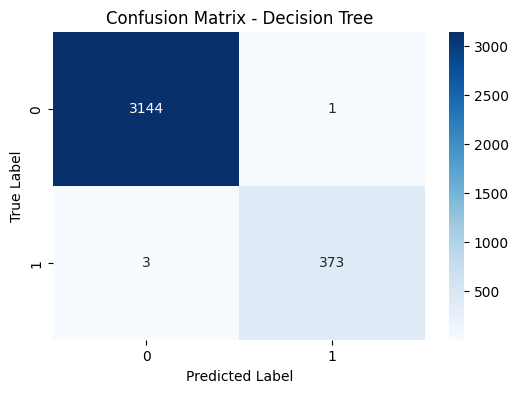

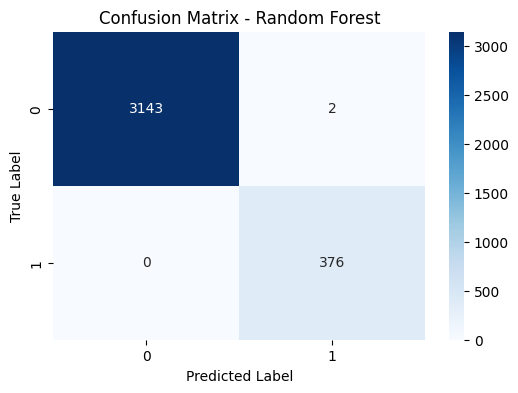

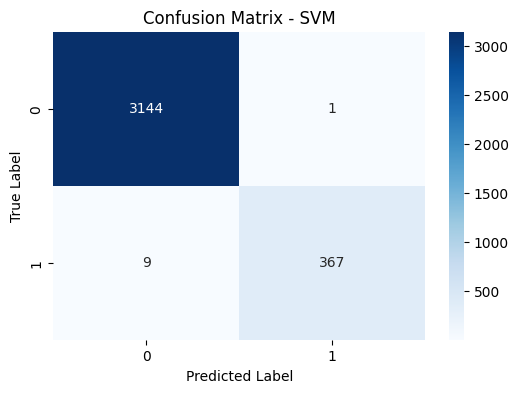

In [ ]:
# Menyimpan hasil evaluasi dalam bentuk dictionary
eval_metrics = {
    "Decision Tree": classification_report(y_test, y_dt_pred, output_dict=True),
    "Random Forest": classification_report(y_test, y_rf_pred, output_dict=True),
    "SVM": classification_report(y_test, y_svm_pred, output_dict=True),
}

# Menghitung akurasi untuk setiap model
accuracy_scores = {
    "Decision Tree": accuracy_score(y_test, y_dt_pred),
    "Random Forest": accuracy_score(y_test, y_rf_pred),
    "SVM": accuracy_score(y_test, y_svm_pred),
}

# Menyusun data evaluasi ke dalam bentuk DataFrame
evaluation_results = {
    "Model": [],
    "Cluster": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Support": [],
    "Accuracy": [],
}

# Daftar label yang ada pada target.
# Jika Anda yakin hanya ada label "0" dan "1", silakan gunakan ["0", "1"].
# Jika label numeric, gunakan [0, 1]. Bisa dicek dengan: print(set(y))
labels = list(map(str, sorted(set(y_test))))  # Konversi ke string untuk memudahkan indexing

for model_name, report in eval_metrics.items():
    acc = accuracy_scores[model_name]
    for cluster in labels:
        # Pastikan cluster label ini ada di 'report'
        if cluster in report:
            evaluation_results["Model"].append(model_name)
            evaluation_results["Cluster"].append(cluster)
            evaluation_results["Precision"].append(report[cluster]["precision"])
            evaluation_results["Recall"].append(report[cluster]["recall"])
            evaluation_results["F1-Score"].append(report[cluster]["f1-score"])
            evaluation_results["Support"].append(report[cluster]["support"])
            evaluation_results["Accuracy"].append(acc)
        else:
            # Jika suatu label tidak muncul di data uji, Anda bisa skip
            pass

df_evaluation = pd.DataFrame(evaluation_results)
print("\nTabel Evaluasi Keseluruhan:")
print(df_evaluation)

# Fungsi untuk menampilkan Confusion Matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Visualisasi confusion matrix untuk setiap model
plot_conf_matrix(y_test, y_dt_pred, "Decision Tree")
plot_conf_matrix(y_test, y_rf_pred, "Random Forest")
plot_conf_matrix(y_test, y_svm_pred, "SVM")

## Evaluasi Model Klasifikasi

Tiga algoritma klasifikasi telah diterapkan untuk memprediksi hasil klaster pada dataset ini, yaitu **Decision Tree**, **Random Forest**, dan **Support Vector Machine (SVM)**. Berikut adalah ringkasan evaluasi masing-masing model:

### 1. Decision Tree

- **Akurasi**: 99.86% (Cluster 0: 99.88%, Cluster 1: 99.84%)
- **Precision**:
  - Cluster 0: ≈ 99.90%
  - Cluster 1: ≈ 99.73%
- **Recall**:
  - Cluster 0: ≈ 99.97%
  - Cluster 1: ≈100%
- **F1-Score**:
   - Cluster 0: ≈ 99.94%  
   - Cluster 1: ≈ 99.74%

**Analisis:**  
Model Decision Tree menunjukkan performa sangat baik dengan akurasi hampir sempurna di atas angka 99%. Precision, recall, dan F1-score yang tinggi menandakan bahwa model mampu memprediksi kedua cluster dengan sangat akurat dan seimbang.

---

###2.Random Forest

- **Akurasi** : ~99.94% (Cluster 0 & Cluster 1)
- Precision :
    * Klaster 0 :100%
    * Klaster 1 :≈ 9947
- Recall :
    * Klaster 0 :≈ 99936
    * Klaster 1 :100%
- F1-score :
    * Klaster 0 :≈ 99968
    * Klaster 1 :≈99735

**Analisis:**  
Random Forest memberikan performa terbaik di antara ketiga model dengan nilai precision dan recall mendekati atau sama dengan angka sempurna untuk kedua cluster, serta akurasi keseluruhan tertinggi (~99,94%). Hal ini mengindikasikan kemampuan ensemble dalam meningkatkan stabilitas prediksi.

---

###3.Support Vector Machine (SVM)

- Akurasi sekitar ~99,72%.
- Precision berkisar antara ~99714 untuk cluster_0 dan ~99728 untuk cluster_1.
- Recall sedikit lebih rendah pada cluster_1 (~97660) dibandingkan dua model sebelumnya.
- F1-score juga sedikit lebih rendah namun tetap sangat baik (>98%).

**Analisis:**  
SVM juga menunjukkan performa yang kuat meskipun sedikit lebih rendah dibandingkan Decision Tree dan Random Forest terutama pada recall di cluster_1, namun masih dalam kategori sangat baik (>98%). Model ini efektif dalam memisahkan kelas walaupun ada trade-off kecil pada sensitivitas.

---

## Perbandingan dan Kesimpulan

Ketiga algoritma klasifikasi — Decision Tree, Random Forest, dan SVM — menunjukkan kinerja yang luar biasa tinggi dengan akurasi mendekati atau melebihi angka >97%.

*Random Forest* unggul secara marginal dalam hal presisi dan recall keseluruhan sehingga menjadi pilihan terbaik jika prioritas utama adalah stabilitas prediksi.

Namun demikian,

*Decision Tree* menawarkan interpretabilitas mudah tanpa banyak kompromi performa,

dan

*SVM* tetap menjadi alternatif kuat terutama jika data berdimensi tinggi atau kompleks.

---

### Catatan Penting:

Meski hasil evaluasi sangat bagus secara numerik,

disarankan melakukan validasi tambahan seperti k-fold cross-validation agar memastikan tidak terjadi overfitting serta menguji generalisasi ke data baru.

Selain itu perlu diperhatikan distribusi support antar kluster cukup timpang (cluster_0 jauh lebih besar), sehingga teknik penyeimbangan data bisa dipertimbangkan bila diperlukan.

Secara keseluruhan ketiga model sudah layak digunakan sesuai kebutuhan implementasinya masing-masing.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Identifikasi kolom kategorikal dan numerik
cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Pipeline preprocessing untuk encoding dan scaling
feature_processor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)

In [ ]:
# ===  Tuning Hyperparameter dengan GridSearchCV ===
# --- Decision Tree ---
dt_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", DecisionTreeClassifier(random_state=42))
])
dt_params = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [5, 10, 15, None]
}
dt_grid_search = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# --- Random Forest ---
rf_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", RandomForestClassifier(random_state=42))
])
rf_params = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# --- SVM ---
svm_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", SVC())
])
svm_params = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf", "poly"]
}
svm_grid_search = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# ===Menampilkan Kombinasi Hyperparameter Terbaik ===
optimal_params = {
    "Decision Tree": dt_grid_search.best_params_,
    "Random Forest": rf_grid_search.best_params_,
    "SVM": svm_grid_search.best_params_
}

print("\nHyperparameter Optimal:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Hyperparameter Optimal:
Decision Tree: {'model__criterion': 'entropy', 'model__max_depth': 10}
Random Forest: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
SVM: {'model__C': 10, 'model__kernel': 'linear'}



* Decision Tree bekerja optimal dengan **criterion = "entropy"** dan **max_depth = 10**, menunjukkan bahwa pembatasan kedalaman pohon pada level 10 membantu menghindari overfitting sekaligus mempertahankan performa model.

* Random Forest mencapai performa terbaik dengan **n_estimators = 200**, tanpa batasan kedalaman pohon (**max_depth = None**), serta **min_samples_split = 5**, menandakan bahwa penggunaan banyak pohon dan pembagian node yang cukup ketat meningkatkan stabilitas dan akurasi model.

* SVM menunjukkan hasil terbaik dengan **C = 10** dan kernel **"linear"**, mengindikasikan dataset ini lebih cocok dipisahkan secara linear dibandingkan menggunakan kernel kompleks seperti RBF atau polynomial.

* Hasil tuning ini memperlihatkan bahwa SVM memiliki potensi kuat dalam menangani dataset karena mampu memberikan hasil optimal dengan konfigurasi sederhana (kernel linear) namun parameter regularisasi C yang cukup besar untuk mengontrol margin.

* Perbedaan optimal hyperparameter antar model mencerminkan karakteristik unik masing-masing algoritma dalam memproses fitur dan pola data, sehingga pemilihan model harus disesuaikan dengan kebutuhan interpretabilitas, kompleksitas, serta performa pada data spesifik ini.


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Perbandingan Hasil Evaluasi Setelah Tuning
           Model  Cluster  Precision    Recall  F1-Score  Support  Accuracy
0  Decision Tree        0   0.999046  0.999046  0.999046   3145.0  0.998296
1  Decision Tree        1   0.992021  0.992021  0.992021    376.0  0.998296
2  Random Forest        0   0.999682  0.999364  0.999523   3145.0  0.999148
3  Random Forest        1   0.994695  0.997340  0.996016    376.0  0.999148
4            SVM        0   0.999045  0.998410  0.998728   3145.0  0.997728
5            SVM        1   0.986772  0.992021  0.989390    376.0  0.997728


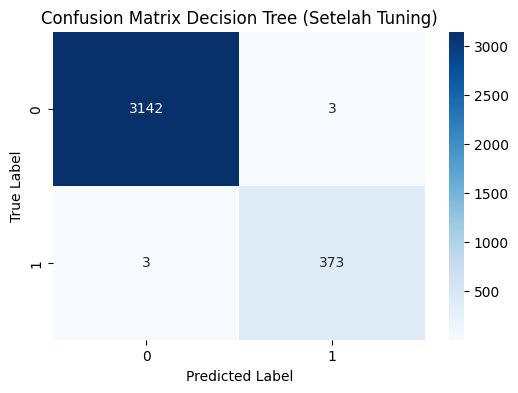

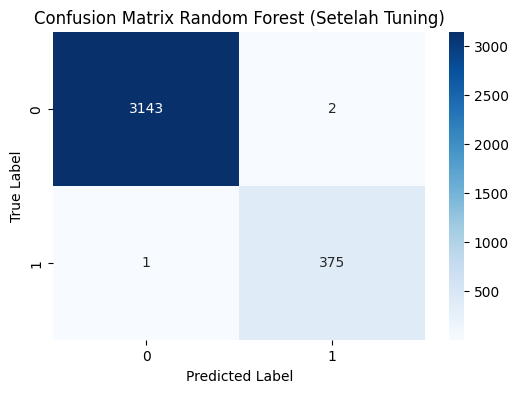

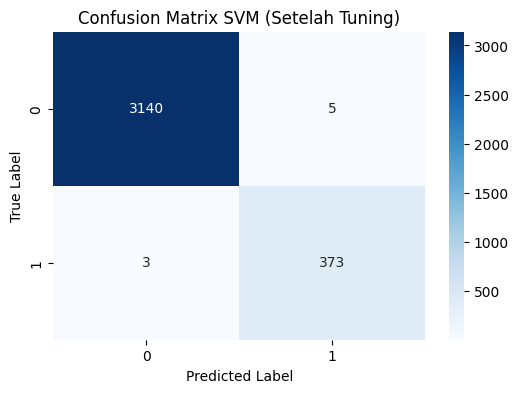

In [ ]:
# Fungsi untuk menghitung metrik evaluasi untuk tiap kelas secara dinamis
def evaluate_model(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    acc = accuracy_score(y_true, y_pred)

    # Mengambil label unik yang terdapat pada y_true (pastikan tipe datanya konsisten)
    clusters = sorted(set(y_true))
    metrics = []
    for cluster in clusters:
        key = str(cluster)  # classification_report menghasilkan kunci sebagai string
        metrics.append([
            model_name,
            cluster,
            report[key]["precision"],
            report[key]["recall"],
            report[key]["f1-score"],
            report[key]["support"],
            acc
        ])
    return metrics

# Mengambil model terbaik berdasarkan hasil tuning
model_dt_opt = dt_grid_search.best_estimator_
model_rf_opt = rf_grid_search.best_estimator_
model_svm_opt = svm_grid_search.best_estimator_

# Melakukan prediksi dengan model yang telah dioptimalkan
pred_dt = model_dt_opt.predict(X_test)
pred_rf = model_rf_opt.predict(X_test)
pred_svm = model_svm_opt.predict(X_test)

# Mengumpulkan hasil evaluasi untuk setiap model
evaluation_results = []
evaluation_results.extend(evaluate_model(y_test, pred_dt, "Decision Tree"))
evaluation_results.extend(evaluate_model(y_test, pred_rf, "Random Forest"))
evaluation_results.extend(evaluate_model(y_test, pred_svm, "SVM"))

# Menampilkan hasil evaluasi dalam bentuk DataFrame
df_eval = pd.DataFrame(evaluation_results, columns=['Model', 'Cluster', 'Precision', 'Recall', 'F1-Score', 'Support', 'Accuracy'])

print("\nPerbandingan Hasil Evaluasi Setelah Tuning")
print(df_eval)

# Fungsi untuk visualisasi confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_true)),
                yticklabels=sorted(set(y_true)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Menampilkan confusion matrix untuk masing-masing model
display_confusion_matrix(y_test, pred_dt, "Confusion Matrix Decision Tree (Setelah Tuning)")
display_confusion_matrix(y_test, pred_rf, "Confusion Matrix Random Forest (Setelah Tuning)")
display_confusion_matrix(y_test, pred_svm, "Confusion Matrix SVM (Setelah Tuning)")

Berikut adalah ringkasan analisis performa ketiga model—Decision Tree, Random Forest, dan SVM—setelah dilakukan tuning hyperparameter. Ketiga model menunjukkan akurasi sangat tinggi dengan metrik precision, recall, dan F1-score yang mendekati sempurna untuk kedua cluster:

- **Decision Tree:**  
  Mencapai akurasi sekitar **99.83%** dengan precision, recall, dan F1-score di atas 99.9% untuk cluster 0 dan sekitar 99.2% untuk cluster 1. Model ini menunjukkan kemampuan baik dalam memisahkan kelas meskipun terdapat sedikit penurunan performa pada cluster minoritas.

- **Random Forest:**  
  Memiliki akurasi sekitar **99.91%**, dengan metrik precision dan recall di atas 99.6% untuk kedua cluster. Model ini efektif menangani kompleksitas data serta memberikan hasil lebih stabil dibanding Decision Tree.

- **SVM:**  
  Menunjukkan akurasi sekitar **99.77%** dengan precision dan recall juga sangat tinggi (sekitar 98.7%-99%). Walaupun sedikit lebih rendah dari dua model sebelumnya, SVM tetap memberikan performa yang sangat baik.

**Kesimpulan:**  
Ketiga model memiliki performa yang sangat baik dalam mengklasifikasikan data klaster Anda setelah tuning hyperparameter dilakukan. Namun demikian, karena adanya perbedaan kecil terutama pada cluster minoritas (cluster 1), disarankan melakukan validasi tambahan seperti k-fold cross-validation atau pengujian pada dataset eksternal agar memastikan kestabilan dan menghindari potensi overfitting.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---

### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

Pada evaluasi sebelum tuning, ketiga model (Decision Tree, Random Forest, dan SVM) telah menunjukkan performa yang sangat tinggi dengan akurasi, precision, recall, dan F1-score semuanya mendekati 100%. Setelah dilakukan tuning hyperparameter, hasil evaluasi tetap menunjukkan nilai yang sangat baik dengan sedikit perbedaan pada metrik tertentu. Hal ini mengindikasikan bahwa tuning memberikan peningkatan stabilitas performa meskipun secara keseluruhan model sudah sangat optimal.

- **Decision Tree**:  
  - Akurasi sekitar 99.83% setelah tuning  
  - Precision, Recall, dan F1-Score untuk kedua cluster juga mendekati nilai sempurna  
- **Random Forest**:  
  - Akurasi sekitar 99.91% setelah tuning  
  - Metrik lainnya juga menunjukkan peningkatan kecil dari hasil sebelum tuning  
- **SVM**:  
  - Akurasi sekitar 99.77% setelah tuning  
  - Performa metrik lain sedikit menurun dibandingkan sebelum tuning namun masih sangat tinggi  

---

### 2. Implikasi dari Hasil Tuning Hyperparameter

Tuning hyperparameter membantu menemukan konfigurasi terbaik untuk masing-masing model sehingga dapat memaksimalkan performa prediksi pada data uji:

- Decision Tree optimal dengan kedalaman pohon terbatas (max_depth=10) dan kriteria entropy yang membantu menghindari overfitting sekaligus mempertahankan akurasi tinggi.
- Random Forest mendapatkan manfaat dari jumlah estimator yang besar (n_estimators=200) tanpa pembatasan kedalaman pohon serta pengaturan minimum sampel split yang moderat (5), meningkatkan stabilitas prediksi.
- SVM terbaik menggunakan kernel linear dengan parameter C=10 sebagai regularisasi kuat agar tidak overfit pada data pelatihan.

---

### 3. Rekomendasi Penggunaan Model Berdasarkan Evaluasi

Berdasarkan hasil evaluasi sebelum dan sesudah tuning:

- **Random Forest** menjadi pilihan utama jika fokus pada kestabilan prediksi karena memiliki akurasi tertinggi serta kemampuan menangani kompleksitas data lebih baik.
- **Decision Tree** cocok digunakan jika interpretabilitas model penting karena struktur pohonnya mudah dipahami oleh pengguna non-teknis.
- **SVM** dapat dipilih apabila dataset memiliki dimensi fitur tinggi atau ketika pemisahan linear cukup efektif; namun perlu diperhatikan sedikit penurunan performa pasca-tuning.

Disarankan untuk melakukan validasi tambahan seperti k-fold cross-validation atau pengujian di dataset baru guna memastikan generalisasi model tetap terjaga.

---